# Problem Statement

    An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
   The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
  

 The company requires to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
   Here our goal is to build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
   ___________________________________________________________________________________________________________________

### Importing dataset

In [1]:
# Suppressing Warnings
import warnings
warnings .filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing dataset
ld_data=pd.read_csv('Leads.csv')
ld_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the Dataframe

In [4]:
ld_data.shape

(9240, 37)

In [5]:
ld_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
ld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Preparation

In [7]:
ld_data=ld_data.replace('Select',np.nan)                   #converting all 'Select' value into null values

In [8]:
ld_data=ld_data.drop(['Prospect ID','Lead Number'],axis=1)    #dropping 'Prospect ID' and 'Lead Number'as these two column have unique values

In [9]:
ld_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
x=ld_data.isnull().mean()*100         #checking the null value percent in each column of the dataset
x

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [11]:
ld_data=ld_data.drop(ld_data.columns[x>40],axis=1)   #dropping the column having missing values more than 40%

In [12]:

ld_data.shape

(9240, 28)

In [13]:
ld_data.isnull().sum()      #getting sum of null values in each column

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

#### Missing value handling

In [14]:
ld_data['Lead Source'].value_counts()     #value counts in 'Lead Source' column

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [15]:
#replacing low frequency values in a new value as 'Other Sources'
ld_data['Lead Source']=ld_data['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Other Sources')

In [16]:
ld_data['Lead Source']=ld_data['Lead Source'].replace(np.nan,'Other Sources')    #replacing null values to 'Other Sources'

In [17]:
ld_data['Lead Source']=ld_data['Lead Source'].replace('google','Google')        #might be an error so converting google to Google

In [18]:
ld_data['Lead Source'].value_counts()    #final value count

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other Sources         59
Facebook              55
Name: Lead Source, dtype: int64

In [19]:
ld_data['TotalVisits'].mean()   #since 'TotalVisits' is a nulmerical column hence getting mean to handle missing values here

3.445237833681204

In [20]:
ld_data['TotalVisits']=ld_data['TotalVisits'].replace(np.nan,3.44) #replacing null with mean values

In [21]:
ld_data['Page Views Per Visit'].mean() #since 'Page Views Per Visit' is a nulmerical column hence getting mean to handle missing values here

2.3628199494672084

In [22]:
ld_data['Page Views Per Visit']=ld_data['Page Views Per Visit'].replace(np.nan,2.36) #replacing null with mean values

In [23]:
ld_data['Last Activity'].value_counts()    #value counts in 'Last Activity' column

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [24]:
#replacing low frequency values in a new value as 'Others'
ld_data['Last Activity']=ld_data['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'others')

In [25]:
ld_data['Last Activity']=ld_data['Last Activity'].replace(np.nan,'others') #replacing null to others

In [26]:
ld_data['Last Activity'].value_counts() #final value counts of 'Last Activity'

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [27]:
ld_data['Country'].value_counts()    #value counts in 'Country' column

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [28]:
ld_data['Country']=ld_data['Country'].replace(np.nan,'India') #replacing null values with mode i.e. with 'India'

In [29]:
#replacing low frequency city values in a new value as 'Foreign Countries'
ld_data['Country']=ld_data['Country'].replace(['United States','United Arab Emirates','Singapore','Saudi Arabia','United Kingdom','Australia','Qatar','Hong Kong','Bahrain','Oman','France','unknown','South Africa','Nigeria','Germany','Kuwait','Canada','Sweden','China','Asia/Pacific Region','Uganda','Bangladesh','Italy','Belgium','Netherlands','Ghana','Philippines','Russia','Switzerland','Vietnam','Denmark','Tanzania','Liberia','Malaysia','Kenya','Sri Lanka','Indonesia'],'Foreign Countries')

In [30]:
ld_data['Country'].value_counts() #final value counts

India                8953
Foreign Countries     287
Name: Country, dtype: int64

In [31]:
ld_data['Specialization'].value_counts() #value counts in 'Specialization' column

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [32]:
#replacing low frequency values in a new value as 'other specializations'
ld_data['Specialization']=ld_data['Specialization'].replace(np.nan,'other specializations')

In [33]:
ld_data['What is your current occupation'].value_counts()   #value counts in 'What is your current occupation' column

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
#replacing null values with mode i.e. with 'Unemployed'
ld_data['What is your current occupation']=ld_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [35]:
ld_data['What matters most to you in choosing a course'].value_counts()  #value counts in 'What matters most to you in choosing a course' column

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
#replacing null values with mode i.e. with 'Better Career Prospects'
ld_data['What matters most to you in choosing a course']=ld_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [37]:
ld_data['Tags'].value_counts() #value counts in 'Tags' column

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [38]:
#replacing null values in a new value as 'No Tags'
ld_data['Tags']=ld_data['Tags'].replace(np.nan,'No Tags')   

In [39]:
#replacing low frequency values in a new value as 'Other Tags'
ld_data['Tags']=ld_data['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Other Tags')

In [40]:
ld_data['Tags'].value_counts() #final value counts

No Tags                                3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other Tags                              302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [41]:
ld_data['City'].value_counts()     #value counts in 'City' column

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [42]:
ld_data['City']=ld_data['City'].replace(np.nan,'Non specified cities')     #replacing null values in a new value as 'Non specified cities'

In [43]:
ld_data.info()     #getting datainfo to check resty of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [44]:
ld_data.isnull().sum()     #null values sum in each column 

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

#### Outlier handling

In [45]:
import matplotlib.pyplot as plt   # Importing matplotlib and seaborn
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x1bce01e8990>,
 'caps': [<matplotlib.lines.Line2D at 0x1bce01e9390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bce01f4490>],
 'medians': [<matplotlib.lines.Line2D at 0x1bce022f410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bce022ff90>],
 'means': []}

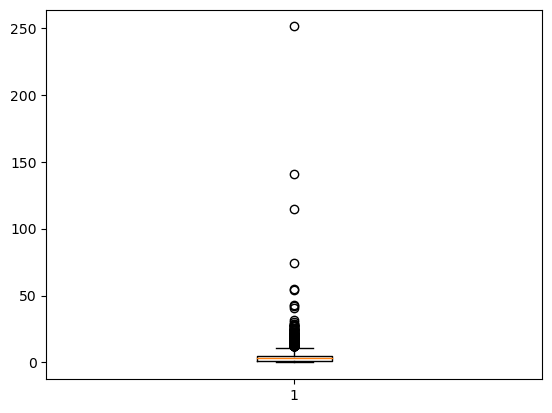

In [46]:
 plt.boxplot(ld_data['TotalVisits'])    #visualising 'TotalVisits'  to check outlier present

In [47]:
#as we can check presence of outlier in above column, hence removing top 1% values 
Q=ld_data['TotalVisits'].quantile(0.99)

In [48]:
ld_data=ld_data[ld_data['TotalVisits']<=Q]

{'whiskers': [<matplotlib.lines.Line2D at 0x1bce0abcf90>,
 'caps': [<matplotlib.lines.Line2D at 0x1bce0abe790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bce01ea210>],
 'medians': [<matplotlib.lines.Line2D at 0x1bce0abfe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bce0ac4890>],
 'means': []}

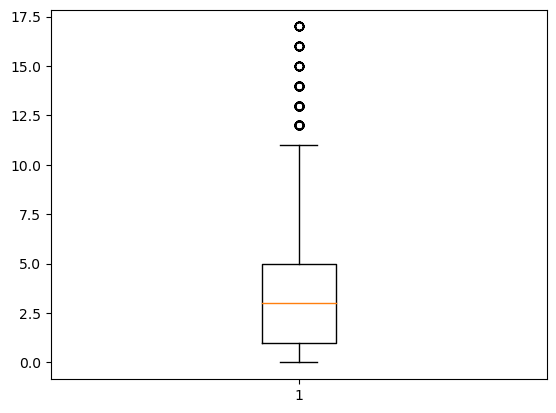

In [49]:
plt.boxplot(ld_data['TotalVisits'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bce0b2df50>,
 'caps': [<matplotlib.lines.Line2D at 0x1bce0aa9950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bce0ac4d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1bce0b38d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bce0aa9710>],
 'means': []}

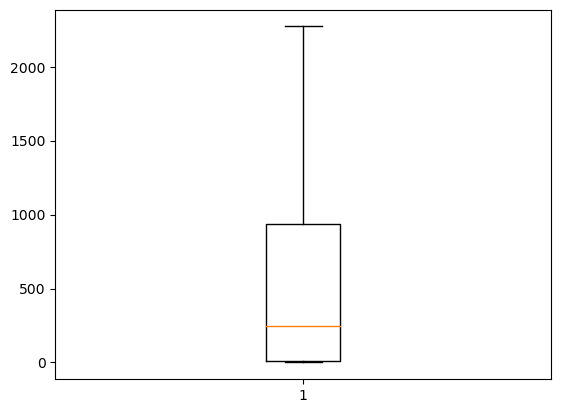

In [50]:
plt.boxplot(ld_data['Total Time Spent on Website'])   #as we can check here absense of outliers on visualising this boxplot

In [51]:
ld_data.shape   

(9157, 28)

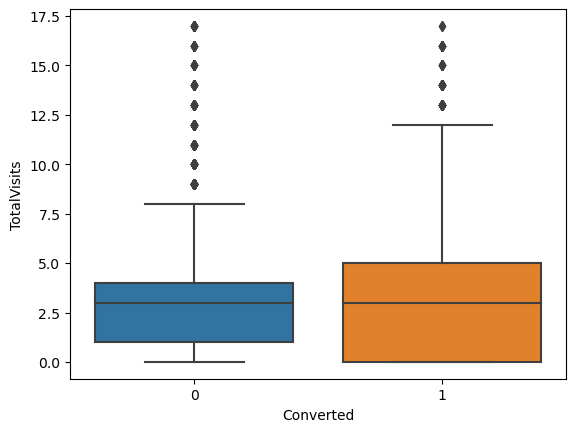

In [52]:
sns.boxplot(y='TotalVisits',x='Converted',data=ld_data)   #checking spread of 'TotalVisits' and 'Converted'
plt.show()

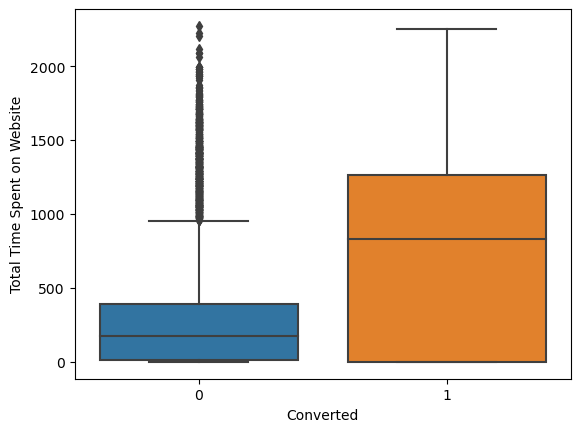

In [53]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=ld_data) #checking spread of 'Total Time Spent on Website' and 'Converted'
plt.show()

In [54]:
#removing th columns which have only one one value so no meaning of keeping them for further analysis
ld_data=ld_data.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [55]:
#final available columns 
ld_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [56]:
ld_data.shape    #final shape

(9157, 23)

#### Converting some binary variables (Yes/No) to 0/1

In [57]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview', 'Through Recommendations', 'Digital Advertisement', 'Newspaper', 'X Education Forums','Newspaper Article','Search','Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
ld_data[varlist] = ld_data[varlist].apply(binary_map)

In [58]:
ld_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,0,0,0,0,Interested in other courses,Non specified cities,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,Ringing,Non specified cities,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,others,India,...,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [59]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(ld_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
ld_data = pd.concat([ld_data, dummy1], axis=1)

In [60]:
ld_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,others,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0


In [61]:
ld_data.shape

(9157, 102)

#### Dropping the repeated variables

In [62]:
ld_data=ld_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City','Last Notable Activity'],axis=1)

In [63]:
ld_data.shape

(9157, 92)

In [64]:
ld_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
ld_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9157 entries, 0 to 9239
Data columns (total 92 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9157 non-null   int64  
 1   Do Not Call                                                              9157 non-null   int64  
 2   Converted                                                                9157 non-null   int64  
 3   TotalVisits                                                              9157 non-null   float64
 4   Total Time Spent on Website                                              9157 non-null   int64  
 5   Page Views Per Visit                                                     9157 non-null   float64
 6   Search                                                                  

#### Test_Train split

In [66]:
#importing library
from sklearn.model_selection import train_test_split

In [67]:
# Putting feature variable to X and Putting response variable to y
X= ld_data.drop('Converted',axis=1)
y=ld_data['Converted']

In [68]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler=StandardScaler()

In [73]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6490,0,0,-0.746630,-0.831303,-0.650428,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4026,1,0,-0.071749,-0.578290,-0.408232,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6453,0,0,2.965219,-0.130933,1.771530,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8949,0,0,0.940574,-0.594791,-0.408232,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6467,0,0,2.627778,-0.767133,4.193489,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Model Building

Running First Training Model

In [74]:
import statsmodels.api as sm

#### Feature Selection Using RFE

In [75]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [76]:
from sklearn.feature_selection import RFE
selector=RFE(logreg,n_features_to_select=13)
rfe=selector.fit(X_train,y_train)
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False])

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('Do Not Call', False, 55),
 ('TotalVisits', False, 45),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 47),
 ('Search', False, 33),
 ('Newspaper Article', False, 62),
 ('X Education Forums', False, 76),
 ('Newspaper', False, 61),
 ('Digital Advertisement', False, 75),
 ('Through Recommendations', False, 49),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 68),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 58),
 ('Lead Source_Other Sources', False, 2),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 59),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Lin

In [78]:
col = X_train.columns[rfe.support_]

In [79]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_others',
       'Country_India', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
  

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1303.3
Date:                Tue, 26 Mar 2024   Deviance:                       2606.6
Time:                        10:51:40   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6047
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7740      0.211    -17.911      0.000      -4.187      -3.361
Total Time Spent on Website                  1.0677      0.061     17.642      0.000       0.949       1.186
Lead Origin_Lead Add Form                    1.6109      0.351      4.587      0.000       0.923       2.299
Lead Source_Olark Chat                       1.3070      0.141      9.263      0.000       1.030       1.583
Lead Source_Welingak Website                 3.9985      0.807      4.954      0.000       2.417       5.580
Last Activity_SMS Sent                       1.9890      0.114     17.510      0.000       1.766       2.212
Tags_Busy                                    2.7250      0.305      8.949      0.000       2.128       3.322
Tags_Closed by Horizzon                      8.8317      0.760     11.623      0.000       7.342      10.321
Tags_Lost to EINS                            7.5646      0.568     13.321      0.000       6.452       8.678
Tags_No Tags                                 2.0777      0.209      9.951      0.000       1.668       2.487
Tags_Ringing                                -1.3724      0.316     -4.345      0.000      -1.991      -0.753
Tags_Will revert after reading the email     6.4907      0.259     25.014      0.000       5.982       6.999
Tags_switched off                           -2.2056      0.761     -2.897      0.004      -3.698      -0.713
Last Notable Activity_Modified              -1.6579      0.121    -13.699      0.000      -1.895      -1.421
============================================================================================================
"""

In [81]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6490    0.001798
4026    0.419513
6453    0.690014
8949    0.889102
6467    0.018406
3481    0.030858
2209    0.023617
1608    0.009291
2969    0.072657
8560    0.031869
dtype: float64

In [82]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00179763, 0.4195128 , 0.69001362, 0.8891018 , 0.01840643,
       0.03085765, 0.02361743, 0.0092915 , 0.07265718, 0.03186852])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [83]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'converted_prob':y_train_pred})
y_train_pred_final['leadId'] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,leadId
0,0,0.001798,6490
1,1,0.419513,4026
2,1,0.690014,6453
3,1,0.889102,8949
4,0,0.018406,6467


Creating new column 'predicted' with 1 if converted_Prob > 0.4 else 0

In [84]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred_final.head()

,converted,converted_prob,leadId,predicted
0,0,0.001798,6490,0
1,1,0.419513,4026,1
2,1,0.690014,6453,1
3,1,0.889102,8949,1
4,0,0.018406,6467,0


In [85]:
from sklearn import metrics     

In [86]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3693  236]
 [ 248 2232]]


In [87]:
# checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted ))

0.9244811983148697


In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.78
10,Tags_Will revert after reading the email,1.68
8,Tags_No Tags,1.65
4,Last Activity_SMS Sent,1.64
2,Lead Source_Olark Chat,1.58
0,Total Time Spent on Website,1.42
12,Last Notable Activity_Modified,1.41
6,Tags_Closed by Horizzon,1.29
3,Lead Source_Welingak Website,1.28
9,Tags_Ringing,1.13


Since VIF for each feature is under range hence no need to change anything here...

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9

In [92]:
# Let us calculate specificity
TN / float(TN+FP)

0.9399338254008653

In [93]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.06006617459913464


In [94]:
# positive predictive value 
print (TP / float(TP+FP))

0.9043760129659644


In [95]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9370718091854859


### Plotting the ROC Curve

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_prob, drop_intermediate = False )

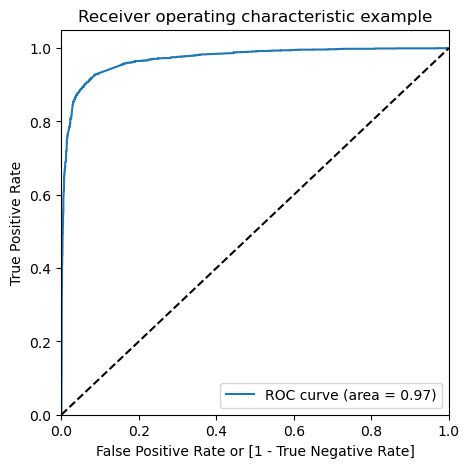

In [98]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_prob)

### Finding Optimal Cutoff Point

In [99]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_prob,leadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001798,6490,0,1,0,0,0,0,0,0,0,0,0
1,1,0.419513,4026,1,1,1,1,1,1,0,0,0,0,0
2,1,0.690014,6453,1,1,1,1,1,1,1,1,0,0,0
3,1,0.889102,8949,1,1,1,1,1,1,1,1,1,1,0
4,0,0.018406,6467,0,1,0,0,0,0,0,0,0,0,0


In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386956  1.000000  0.000000
0.1   0.1  0.833047  0.972177  0.745228
0.2   0.2  0.887190  0.953226  0.845508
0.3   0.3  0.920736  0.917742  0.922627
0.4   0.4  0.924481  0.900000  0.939934
0.5   0.5  0.926042  0.880645  0.954696
0.6   0.6  0.924637  0.858065  0.966658
0.7   0.7  0.910907  0.806855  0.976584
0.8   0.8  0.900921  0.773790  0.981166
0.9   0.9  0.877984  0.703629  0.988038


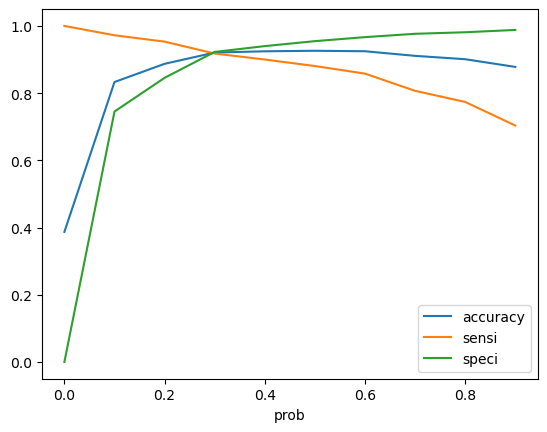

In [101]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,converted,converted_prob,leadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.001798,6490,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.419513,4026,1,1,1,1,1,1,0,0,0,0,0,1
2,1,0.690014,6453,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.889102,8949,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.018406,6467,0,1,0,0,0,0,0,0,0,0,0,0


In [103]:
#creating Leadscore column 
y_train_pred_final['Leadscore']=y_train_pred_final.converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,converted,converted_prob,leadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Leadscore
0,0,0.001798,6490,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0.419513,4026,1,1,1,1,1,1,0,0,0,0,0,1,42
2,1,0.690014,6453,1,1,1,1,1,1,1,1,0,0,0,1,69
3,1,0.889102,8949,1,1,1,1,1,1,1,1,1,1,0,1,89
4,0,0.018406,6467,0,1,0,0,0,0,0,0,0,0,0,0,2


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.9207364643470121

In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3625,  304],
       [ 204, 2276]], dtype=int64)

In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.917741935483871

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.9226266225502673

In [109]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07737337744973276


In [110]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8821705426356589


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9467223818229302


#### Precision and Recall

In [112]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion

array([[3693,  236],
       [ 248, 2232]], dtype=int64)

In [113]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9043760129659644

In [114]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9

In [115]:
from sklearn.metrics import precision_score, recall_score

In [116]:
precision_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.9043760129659644

In [117]:
recall_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.9

Precision and recall tradeoff

In [118]:
from sklearn.metrics import precision_recall_curve

In [119]:
y_train_pred_final.converted, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6404    0
 6405    1
 6406    1
 6407    1
 6408    1
 Name: converted, Length: 6409, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6404    0
 6405    1
 6406    1
 6407    1
 6408    1
 Name: predicted, Length: 6409, dtype: int64)

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_prob)

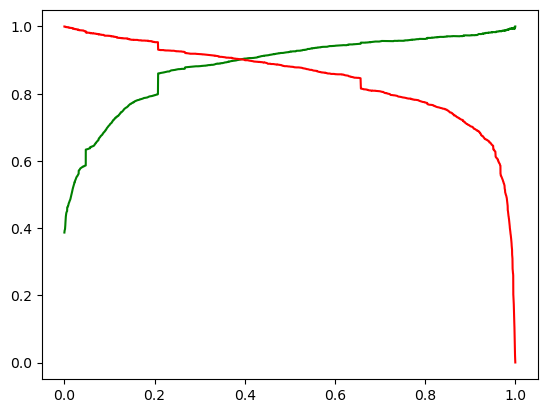

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [122]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [123]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_No Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified
7359,-0.207937,0,0,0,1,0,0,0,0,0,0,0,0
2201,-0.653460,0,0,0,0,0,0,0,0,0,0,0,1
2473,1.486150,0,0,0,1,0,0,0,0,0,1,0,0
8388,-0.657127,0,0,0,0,0,0,0,0,0,0,0,1
2949,-0.492119,0,0,0,0,0,0,0,0,0,0,1,1


In [124]:
X_test_sm = sm.add_constant(X_test)
X_test = X_test[col]
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_No Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified
7359,1.0,-0.207937,0,0,0,1,0,0,0,0,0,0,0,0
2201,1.0,-0.653460,0,0,0,0,0,0,0,0,0,0,0,1
2473,1.0,1.486150,0,0,0,1,0,0,0,0,0,1,0,0
8388,1.0,-0.657127,0,0,0,0,0,0,0,0,0,0,0,1
2949,1.0,-0.492119,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,1.0,-0.374779,0,0,0,0,0,0,0,1,0,0,0,0
3154,1.0,-0.712130,0,0,0,0,0,0,0,0,0,0,0,0
9118,1.0,-0.666294,0,0,0,1,0,0,0,0,0,0,1,0
8092,1.0,-0.889973,1,0,0,0,0,0,0,0,0,1,0,0


In [125]:
y_test_pred = res.predict(X_test_sm)

In [126]:
y_test_pred[:10]

7359    0.118463
2201    0.002173
2473    0.998153
8388    0.002164
2949    0.000285
8144    0.870283
8443    0.955782
290     0.047541
8626    0.020456
5709    0.586281
dtype: float64

In [127]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [128]:

y_pred_1.head()

,0
7359,0.118463
2201,0.002173
2473,0.998153
8388,0.002164
2949,0.000285


In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [130]:
# Putting leadId to index
y_test_df['leadId'] = y_test_df.index

In [131]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [132]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [133]:
y_pred_final.head()

,Converted,leadId,0
0,0,7359,0.118463
1,0,2201,0.002173
2,1,2473,0.998153
3,0,8388,0.002164
4,0,2949,0.000285


In [134]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'converted_Prob'})

In [135]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,leadId,converted_Prob
0,0,7359,0.118463
1,0,2201,0.002173
2,1,2473,0.998153
3,0,8388,0.002164
4,0,2949,0.000285


Creating final_predicted column with optimal cutoff point

In [136]:
y_pred_final['final_predicted'] = y_pred_final.converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [137]:
y_pred_final.head()

,Converted,leadId,converted_Prob,final_predicted
0,0,7359,0.118463,0
1,0,2201,0.002173,0
2,1,2473,0.998153,1
3,0,8388,0.002164,0
4,0,2949,0.000285,0


creating Leadscore column 

In [138]:
y_pred_final['Leadscore'] = y_pred_final.converted_Prob.map(lambda x:round(x*100))
y_pred_final.head()

,Converted,leadId,converted_Prob,final_predicted,Leadscore
0,0,7359,0.118463,0,12
1,0,2201,0.002173,0,0
2,1,2473,0.998153,1,100
3,0,8388,0.002164,0,0
4,0,2949,0.000285,0,0


In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9286754002911208

In [140]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1588,  115],
       [  81,  964]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9224880382775119

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.9324721080446271